# Make sure to practice in Codility

In [1]:
!pip install duckdb jupysql --quiet

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

import duckdb
%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb

Deploy Panel apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


Different statistical tests, their assumptions, and applications:

1. **Correlation Test**:
   - **Research Question**: Are two variables (n = 2) correlated (associated)?
   - **Test Assumptions**:
     - Data should be continuous.
     - Linear relationship between variables.
   - **Application**: Assessing the strength and direction of association between two continuous variables.

2. **Correlation Matrix**:
   - **Research Question**: Are multiple variables (n > 2) correlated?
   - **Test Assumptions**: Same as correlation test.
   - **Application**: Understanding relationships among multiple variables.

3. **Student’s t-Test** (Parametric):
   - **Research Question**: Do two groups (n = 2) of samples differ from each other?
   - **Test Assumptions**:
     - Data should be continuous.
     - Normally distributed.
     - Equal variances.
   - **Application**: Comparing means between two independent groups.

4. **Wilcoxon Rank Test** (Non-parametric):
   - **Research Question**: Similar to t-test but for non-normal data.
   - **Test Assumptions**: No specific distribution assumption.
   - **Application**: Comparing means between two groups when assumptions for t-test are violated.

5. **ANOVA Test** (Parametric):
   - **Research Question**: Do means of more than two groups differ?
   - **Test Assumptions**:
     - Data should be continuous.
     - Normally distributed.
     - Equal variances.
   - **Application**: Comparing means across multiple groups.

6. **Kruskal-Wallis Rank Sum Test** (Non-parametric):
   - **Research Question**: Similar to ANOVA but for non-normal data.
   - **Test Assumptions**: No specific distribution assumption.
   - **Application**: Comparing means across multiple groups when assumptions for ANOVA are violated.

7. **F-Test** (Parametric):
   - **Research Question**: Comparing variances of two groups.
   - **Test Assumptions**:
     - Data should be continuous.
     - Normally distributed.
   - **Application**: Assessing whether variances are equal between two groups.

8. **Bartlett’s Test** (Parametric), **Levene’s Test** (Parametric), and **Fligner-Killeen Test** (Non-parametric):
   - **Research Question**: Comparing variances of more than two groups.
   - **Test Assumptions**: Similar to F-test.
   - **Application**: Evaluating variance equality across multiple groups.

Remember that these assumptions should be taken seriously to draw reliable interpretations and conclusions from your research. If assumptions are violated, consider using non-parametric tests instead. Always assess normality and equality of variances before applying parametric tests.

**standard error** in statistics:

1. **Definition**:
   - The **standard error (SE)** is a measure of how much the **sample mean** differs from the **population mean**.
   - It quantifies the variability between the sample mean and the true population mean.
   - Essentially, it tells us how much the sample mean would vary if we were to repeat the study using new samples from the same population.

2. **Why Standard Error Matters**:
   - In statistical analysis, we often work with **sample data** to make inferences about a larger **population**.
   - Standard error helps us estimate how well our sample data represents the entire population.
   - Even with **probability sampling**, where elements are randomly selected, some **sampling error** remains. The sample won't perfectly match the population in terms of measures like means and standard deviations.
   - By calculating the standard error, we can assess how representative our sample is and draw valid conclusions.

3. **Standard Error vs. Standard Deviation**:
   - **Standard deviation** describes variability within a single sample.
   - **Standard error** estimates variability across multiple samples from the same population.
   - While standard deviation is a descriptive statistic calculated from sample data, standard error is an inferential statistic that can only be estimated (unless the true population parameter is known).

4. **Formula for Standard Error**:
   - For the **sample mean**, the standard error is often denoted as **SEM** (standard error of the mean).
   - The formula for SEM is:
     \[ \text{SEM} = \frac{\text{standard deviation}}{\sqrt{n}} \]
     where:
     - \(\text{standard deviation}\) is the sample's standard deviation.
     - \(n\) is the sample size.

5. **Reporting the Standard Error**:
   - When reporting results, it's common to include the **mean** along with its **standard error**.
   - For example: "The average weight of apples is 150 grams (SE = 5 grams)."

Remember, a **high standard error** indicates that sample means are widely spread around the population mean, suggesting that the sample may not closely represent the population. Conversely, a **low standard error** indicates that sample means are closely distributed around the population mean, implying that the sample is representative of the population¹²³⁴. 📊🔍.

Source: Conversation with Bing, 3/12/2024
(1) What Is Standard Error? | How to Calculate (Guide with Examples) - Scribbr. https://www.scribbr.com/statistics/standard-error/.
(2) Standard Error (SE) Definition: Standard Deviation in ... - Investopedia. https://www.investopedia.com/terms/s/standard-error.asp.
(3) Standard error - Wikipedia. https://en.wikipedia.org/wiki/Standard_error.
(4) Standard Error - Overview, Formula, and Importance. https://corporatefinanceinstitute.com/resources/data-science/standard-error/.
(5) en.wikipedia.org. https://en.wikipedia.org/wiki/Standard_error.

## Equality of Variances Assumption:
Many statistical tests assume that the variances (or standard deviations) of different groups or samples are approximately equal.

Certainly! Let's explore the assumptions associated with **Student’s t-test**:

1. **Independence**:
   - The observations in one sample must be **independent** of the observations in the other sample.
   - If the same individuals appear in both samples, it's not valid to draw conclusions about differences between the samples.
   - To check this assumption, verify that each observation appears only once in each sample and that the observations were collected using **random sampling**.

2. **Normality**:
   - Both samples should be **approximately normally distributed**.
   - If the sample sizes are small (n < 50), use a **Shapiro-Wilk test** to assess normality.
   - For larger sample sizes, visually inspect a **Q-Q plot** to check if data points fall along a straight diagonal line (indicating normal distribution).
   - If normality is violated, consider using the **Mann-Whitney U test**, a non-parametric alternative.

3. **Homogeneity of Variances**:
   - The two samples should have **similar variances** (homogeneity).
   - A rule of thumb: If the ratio of the larger variance to the smaller variance is less than 4, assume approximately equal variances.
   - If variances differ significantly, consider robust alternatives or use the **Welch's t-test**.

Remember that violating these assumptions may affect the validity of your t-test results. Choose appropriate tests based on your data characteristics. 📊🔍

___

# What is the Python code for calculating the confidence intervals for a mean?

In [3]:
#ChatGPT 4.0 Turbo:

# Let's assume you have some data in a Python list
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculate the mean and standard error
mean = np.mean(data)
standard_error = scipy.stats.sem(data)

# Define the confidence level to be 95%
confidence_level = 0.95

# Calculate the confidence interval
confidence_interval = scipy.stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=standard_error)

print(f"The confidence interval is: {confidence_interval}")

The confidence interval is: (3.3341494103866087, 7.665850589613392)


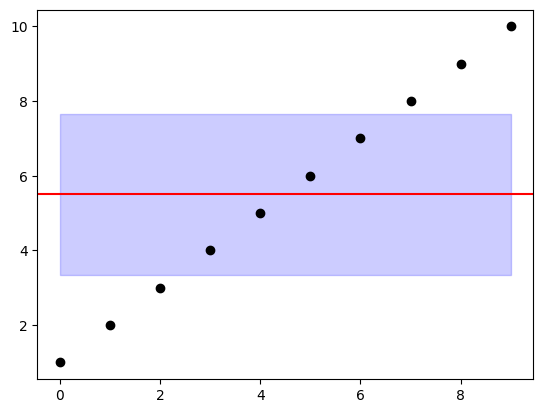

In [4]:
# Plot the CI intervals

# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot the mean as a red line
ax.axhline(mean, color='red')

# Plot the confidence interval as a blue band
ax.fill_between(range(len(data)), confidence_interval[0], confidence_interval[1], color='blue', alpha=0.2)

# Plot the data points
ax.plot(data, 'ko')

# Show the plot
plt.show()

# How can you generate a dataset of 1000 normally distributed points with mean=x and variance=y, provide summary statistics, and plot the density?

Original Q: In R, how can you generate a dataset of 1000 normally distributed points with mean=x and variance=y, provide summary statistics, and plot the density? Also, replicate these steps in a Python script within Codility's editor.

              Data
count  1000.000000
mean      0.038937
std       1.007716
min      -3.591367
25%      -0.601531
50%       0.038258
75%       0.715928
max       3.503060


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

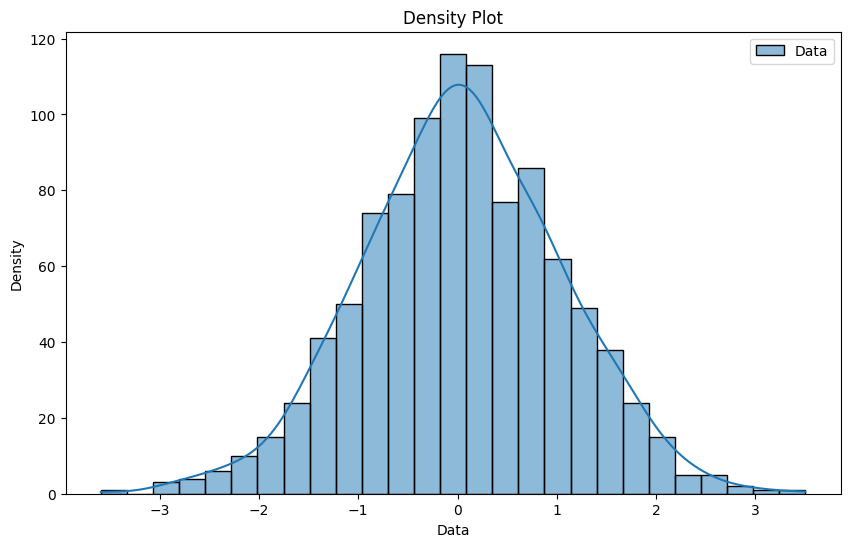

In [5]:
# Completing above in Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the mean and variance
mean = 0  # replace with your value
variance = 1  # replace with your value
std_dev = np.sqrt(variance)  # standard deviation is the square root of the variance

# Generate the dataset
data = np.random.normal(loc=mean, scale=std_dev, size=1000)

# Convert to pandas DataFrame for easier handling
df = pd.DataFrame(data, columns=['Data'])

# Print summary statistics
print(df.describe())

# Plot the density
plt.figure(figsize=(10, 6))
sns.histplot(df, kde=True)
plt.title('Density Plot')
plt.xlabel('Data')
plt.ylabel('Density')
plt.show()

# Explain the concept of percentiles in statistics, and how you would go about finding the nth percentile of a dataset? Can you write a code for finding the nth percentile of a dataset.

Simple explanation:

Imagine you and your friends just had a race, and the times it took each of you to finish were written down. Now, if these times are arranged from fastest to slowest, the “percentile” is a way of saying what <span style="color:#FF0000"> percentage of the times are less than or equal to a certain time<span>.

For example, if your time is at the 50th percentile (also known as the median), that means <span style="color:#FF0000"> you ran faster than or equal to 50% of your friends<span>.

Now, let’s say we want to find the nth percentile of a list of numbers (like the race times). Here’s how you can do it with Python code:

In [6]:
import numpy as np

# Let's say these are the race times
times = [5, 8, 4, 7, 6, 3, 7, 8, 5, 6]

# And we want to find the 50th percentile (replace 50 with your desired percentile)
percentile = 50

# Use the numpy.percentile function to find the nth percentile
nth_percentile = np.percentile(times, percentile)

print(f"The {percentile}th percentile is {nth_percentile}")

The 50th percentile is 6.0


Technical explanation:

In statistics, a percentile is a measure used to indicate the value below which a given percentage of observations in a group of observations falls. For example, the 20th percentile is the value (or score) below which 20% of the observations may be found.

Percentiles are often used in academics to compare scores across different tests or subjects. They are also used in various fields such as finance, health, and more, to provide a relative standard of measurement.

To find the nth percentile of a dataset, you would follow these steps:

1. Sort the data in ascending order.
2. Calculate the rank ® using the formula R = P/100 * (N + 1), where P is the desired percentile and N is the number of data points.
3. 
 * If R is an integer, the Pth percentile is the number at position R in the sorted list.
 * If R is not an integer, round it up and down to the nearest integers and take the average of the numbers at these two positions in the sorted list.
 
In Python, you can use the numpy.percentile function to calculate percentiles. Here’s an example:

In [7]:
import numpy as np

# Assuming data is your dataset
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calculate the 25th percentile
p = 25
percentile = np.percentile(data, p)

print(f"The {p}th percentile is {percentile}")

The 25th percentile is 3.25


# What is the maximum likelihood of getting k heads when you tossed coin n times? Explain the math behind it.

Simple explanation:

Imagine you have a fair coin (which means it’s just as likely to land on heads as it is to land on tails), and you flip it n times. Let’s say you get k heads. Now, you’re wondering: <span style="color:#FF0000"> if I did this many times, how often would I get k heads? That’s what “maximum likelihood” is all about! <span>

Here’s a simple way to think about it:

Each time you flip the coin, there’s a 50% chance it lands on heads, and a 50% chance it lands on tails. That’s because it’s a fair coin.

If you flip the coin n times, there are many different outcomes possible. For example, if n=3, you could get HHT, HTH, THH, TTH, THT, HTT, HHH, or TTT (where H represents heads and T represents tails).

Out of all these outcomes, some of them have exactly k heads. The “maximum likelihood” is the <span style="color:#FF0000"> most common outcome among these<span>.
    
In math terms, we use something called the binomial distribution to calculate this. But don’t worry about that for now - the important thing is that the maximum likelihood tells us the <span style="color:#FF0000"> most common outcome if we repeat an experiment many times<span>.

Technical explanation:

In statistics, the concept of maximum likelihood estimation (MLE) is used to estimate the parameters of a statistical model. In the context of tossing a coin n times and getting k heads, we can use MLE to estimate the probability of getting a head (p).

The likelihood of getting k heads in n tosses follows a Binomial distribution. The probability mass function of the Binomial distribution is given by:

$$
P(X=k) = C(n, k) \cdot p^k \cdot (1-p)^{n-k}
$$

where:
- $P(X=k)$ is the probability of getting exactly k heads in n tosses,
- $C(n, k)$ is the binomial coefficient, which is the number of ways to choose k heads from n tosses,
- $p$ is the probability of getting a head in a single toss,
- $n$ is the number of tosses,
- $k$ is the number of heads.

The MLE for p (probability of getting a head) is simply the sample mean, i.e., the number of heads divided by the number of tosses. So if you tossed a coin n times and observed k heads, your MLE for p would be $\hat{p} = \frac{k}{n}$.

This is because the likelihood function $L(p; X=k)$ is maximized when $p = \frac{k}{n}$. You can prove this by taking the derivative of the likelihood function with respect to p, setting it equal to zero, and solving for p. This gives you the value of p that maximizes the likelihood of observing the data given the model, which is the definition of MLE. 

So, in summary, the maximum likelihood of getting k heads when you tossed a coin n times is achieved when the probability of getting a head is estimated to be the ratio of the number of heads to the total number of tosses. This is a fundamental concept in statistics and is used in many areas of data science.

# What SQL technique would you use to obtain distinct conversation events from a database?

In [8]:
# SELECT DISTINCT conversation_id, event_type
# FROM conversation_events;

# How would you write a Python script to produce the Fibonacci series?

In [9]:
def fibonacci(n):
    fib_sequence = [0, 1]
    while len(fib_sequence) < n:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    return fib_sequence

# Print the first 10 terms of the Fibonacci series
print(fibonacci(10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


# Can you write a Python function that yields a Bernoulli-distributed matrix and scales each element by the sum of its respective column?

In [10]:
def generate_and_scale_matrix(n_rows, n_cols, p=0.5):
    # Generate a Bernoulli-distributed matrix
    matrix = np.random.binomial(1, p, size=(n_rows, n_cols))
    
    # Calculate the column sums
    col_sums = matrix.sum(axis=0)
    
    # To avoid division by zero, replace zero sums with a small number
    col_sums[col_sums == 0] = 1e-10
    
    # Scale each element by the sum of its respective column
    scaled_matrix = matrix / col_sums
    
    return scaled_matrix

generate_and_scale_matrix(3,3)

/tmp/ipykernel_18/1505227064.py:12: RuntimeWarning: invalid value encountered in divide
  scaled_matrix = matrix / col_sums


array([[0.33333333,        nan, 0.        ],
       [0.33333333,        nan, 1.        ],
       [0.33333333,        nan, 0.        ]])

# Outline the development of a shuffle() function that employs roll() to ensure equal probability of permutations.

In [11]:
import random

def shuffle(deck):
    # Go through each card in the deck
    for i in range(len(deck)):
        # Choose a random other card in the deck
        j = random.randint(i, len(deck) - 1) # this and following line produces roll()
        # Swap them
        deck[i], deck[j] = deck[j], deck[i]
    return deck

deck = ['Ace of Spades', '2 of Spades', '3 of Spades', '4 of Spades', '5 of Spades', '6 of Spades', '7 of Spades', '8 of Spades', '9 of Spades', '10 of Spades', 'Jack of Spades', 'Queen of Spades', 'King of Spades',
        'Ace of Hearts', '2 of Hearts', '3 of Hearts', '4 of Hearts', '5 of Hearts', '6 of Hearts', '7 of Hearts', '8 of Hearts', '9 of Hearts', '10 of Hearts', 'Jack of Hearts', 'Queen of Hearts', 'King of Hearts',
        'Ace of Diamonds', '2 of Diamonds', '3 of Diamonds', '4 of Diamonds', '5 of Diamonds', '6 of Diamonds', '7 of Diamonds', '8 of Diamonds', '9 of Diamonds', '10 of Diamonds', 'Jack of Diamonds', 'Queen of Diamonds', 'King of Diamonds',
        'Ace of Clubs', '2 of Clubs', '3 of Clubs', '4 of Clubs', '5 of Clubs', '6 of Clubs', '7 of Clubs', '8 of Clubs', '9 of Clubs', '10 of Clubs', 'Jack of Clubs', 'Queen of Clubs', 'King of Clubs']

shuffle(deck)

['4 of Clubs',
 '7 of Clubs',
 '2 of Diamonds',
 '3 of Diamonds',
 'Ace of Diamonds',
 'King of Clubs',
 '2 of Spades',
 '9 of Clubs',
 'King of Spades',
 '4 of Spades',
 'Queen of Hearts',
 '6 of Clubs',
 '5 of Diamonds',
 'Ace of Spades',
 '7 of Hearts',
 '10 of Spades',
 'Jack of Spades',
 '9 of Spades',
 'King of Diamonds',
 '8 of Spades',
 '10 of Diamonds',
 '7 of Diamonds',
 '8 of Hearts',
 '9 of Diamonds',
 '7 of Spades',
 '9 of Hearts',
 'Jack of Clubs',
 '3 of Spades',
 '5 of Clubs',
 'Jack of Hearts',
 '2 of Hearts',
 'Jack of Diamonds',
 'Ace of Clubs',
 '6 of Diamonds',
 'Queen of Spades',
 '8 of Clubs',
 '3 of Clubs',
 '5 of Spades',
 '3 of Hearts',
 '10 of Hearts',
 '10 of Clubs',
 '2 of Clubs',
 '4 of Hearts',
 'Queen of Diamonds',
 '6 of Spades',
 'Ace of Hearts',
 'Queen of Clubs',
 '8 of Diamonds',
 '6 of Hearts',
 '5 of Hearts',
 '4 of Diamonds',
 'King of Hearts']

# Have you ever encountered a coin that you suspected to be biased? If so, what gave it away?

A coin might be suspected of being biased if it consistently lands on one side more often than the other over a large number of flips (streaks). This could be due to its weight distribution, the way it’s flipped, or other factors. For example, if you <span style="color:#FF0000"> flipped a coin 100 times<span> and it landed on heads <span style="color:#FF0000">80 times<span>, you might suspect that the coin is biased towards heads.

However, it’s important to remember that randomness can sometimes produce results that seem non-random. Even <span style="color:#FF0000">a fair coin could, by chance, land on heads 80 times out of 100<span>. So, to be confident that a coin is biased, you would need to see a significant deviation from the expected 50/50 split of heads and tails over a large number of flips.

Statistical tests, such as the <span style="color:#FF0000">Chi-Square test<span>, can be used to determine if the difference between the observed results and the expected results is statistically significant. <span style="color:#FF0000">If the test shows that the difference is statistically significant, it would give away that the coin is likely biased<span>.

# Assuming you have a container holding 4 red balls and 2 blue balls, what are the chances of selecting one red ball and one blue ball consecutively without returning the first pick?

First, let’s find the total number of balls. 

We have 4 red balls and 2 blue balls, so that’s 6 balls in total.
If we want to pick one red ball first, there are 4 red balls out of 6 total balls. So the probability of picking a red ball first is 4 out of 6, or 

$\frac{4}{6}$ = $\frac{2}{3}$
.

After we’ve picked a red ball, we don’t put it back in the container. So now there are only 5 balls left in the container.

Next, we want to pick a blue ball. There are 2 blue balls out of the 5 remaining balls. So the probability of picking a blue ball next is 2 out of 5, or 

$\frac{2}{5}$
​
.
To find the probability of both events happening in order (picking a red ball first and then a blue ball), we multiply the probabilities together:

$\frac{2}{3}$ x $\frac{2}{5}$ = $\frac{4}{15}$
​

So the chances of picking one red ball and then one blue ball consecutively without returning the first pick is 

$\frac{4}{15}$​

(Most likely will not be a plausible question given role, but including just in case)

# Can you demonstrate how dynamic programming can be used to find an array's longest increasing sequence?

In [12]:
def longest_increasing_subsequence(arr):
    n = len(arr)

    # Initialize the list with 1, because a single character itself is a subsequence of length 1
    lis = [1] * n

    # Compute optimized LIS values in a bottom-up manner
    for i in range (1, n):
        for j in range(0, i):
            if arr[i] > arr[j] and lis[i] < lis[j] + 1:
                lis[i] = lis[j]+1

    # Initialize maximum to 0 to get the maximum of all LIS
    maximum = 0

    # Pick maximum of all LIS values
    for i in range(len(lis)):
        maximum = max(maximum, lis[i])

    return maximum

# Test the function
arr = [10, 22, 9, 33, 21, 50, 41, 60]
print("Length of the longest increasing subsequence is", longest_increasing_subsequence(arr))

Length of the longest increasing subsequence is 5


# Can you walk me through the process of conducting an A/B test to compare the effectiveness of two product campaigns, with a goal of detecting a 3% improvement in performance?

Refer to:
1. DS Interview A/B Testing Question in INTERVIEW PREP
2. A/B Testing Practicaly 
* Customize hypothesis statements
* and MDE of 3%
* CUPED to reduce variance, etc needed?

(Most likely will not be asked this, but still including)

# Can you demonstrate an algorithm to combine two sorted arrays into one that remains sorted?

In [13]:
def merge_sorted_lists(list1, list2):
    # Initialize an empty list to store the sorted elements
    sorted_list = []
    
    # While both lists have elements
    while list1 and list2:
        # If the first element of list1 is smaller
        if list1[0] < list2[0]:
            # Append it to the sorted list and remove it from list1
            sorted_list.append(list1.pop(0))
        else:
            # Otherwise, append the first element of list2 to the sorted list and remove it from list2
            sorted_list.append(list2.pop(0))
    
    # If there are remaining elements in either list, add them to the sorted list
    sorted_list += list1
    sorted_list += list2
    
    return sorted_list

list1 = [1, 3, 5, 7]
list2 = [2, 4, 6, 8]
merged_list = merge_sorted_lists(list1, list2)
print(merged_list)  # Output: [1, 2, 3, 4, 5, 6, 7, 8]

[1, 2, 3, 4, 5, 6, 7, 8]


(Might not be asked, but still including)

# Could you architect a Python class that functions as an iterator for sequences?

In [14]:
class SequenceIterator:
    def __init__(self, sequence):
        # The sequence to iterate over
        self.sequence = sequence
        # The current index of the sequence
        self.index = 0

    def __iter__(self):
        # The __iter__ method returns the iterator object itself
        return self

    def __next__(self):
        # The __next__ method returns the next value from the sequence
        if self.index < len(self.sequence):
            result = self.sequence[self.index]
            self.index += 1
            return result
        else:
            # Once all items have been returned, raise the StopIteration exception
            raise StopIteration

seq_iter = SequenceIterator([1, 2, 3, 4, 5])
for item in seq_iter:
    print(item)  # Output: 1, 2, 3, 4, 5 (on separate lines)

1
2
3
4
5


# What would be your advice for a product team if usage metrics show a decline leading up to a new product launch?

1. Ask some clarifying questions.
* This is right after a full experiment run?
* Competitor launched something?
* Some change in local/gov't laws?


* If key and guardrail metrics drop significantly and continuously then consider taking a step back and re-eval experiment for benefit of users and prod!

* If there are SURPRISES(not stat sig pos result/stat sig neg result), delve deeper to understand why
**  New/old users, channels, geographic regions assuming these were not used as invariant metrics
* Usually, not having stat sig results due to INSUFFICIENT  STAT POWER
*  Try other metrics with less variance
** CUPED -  uses pre-experiment data to control for natural variation in an experiment’s north star metric. By removing natural variation, we can run statistical tests that require a smaller sample size. CUPED can be added to virtually any A/B testing framework; it’s computationally efficient and fairly straightforward to code.


* Validity Checks-Did the experiment run soundly without errors or bias?
	* Flawed experiment design?
	* Instrumentation Effect- Guardrail metrics e.g. Latency time - bugs/glitches
	* External Factors- Holidays, Competition Launched something important, economic disruptions - COVID
	* Selection Bias - underlying dist between ctl and treatment before running test are homogenous--> run A/A test
	* Sample Ratio Mismatch- to ensure ratio between two user groups is sound (50/50 and not 49.51)-> Chi-Square Goodness of Fit Test 
	* Novelty Effect- change to website, reaction to exposure to something new. Look at it by user segment; underlying diff in success metric in terms of new vs recurring users. If there is delta then presence of novelty effect--> run experiment in novelty group then run experiment again in recurring user group


As a product data scientist, my advice would be to approach this situation systematically and objectively. Here are the steps I would recommend:

1. **Understand the Metrics**: First, it's important to understand what the metrics are telling us. Is the decline across all user segments or specific to certain ones? Are there any patterns or trends that could explain this decline?

2. **Investigate the Cause**: Once we have a better understanding of the metrics, the next step is to investigate potential causes. This could involve looking at user feedback, conducting user interviews, or analyzing product usage data.

3. **Evaluate the New Feature**: It's also important to evaluate the new feature itself. Is it functioning as expected? Are there any bugs or issues that could be causing users to leave?

4. **Conduct (another) A/B Testing**: If possible, conduct A/B testing to compare the performance of the new feature against the old one. This can provide valuable insights into whether the new feature is contributing to the decline in usage.

5. **Develop a Plan**: Based on the findings from the above steps, develop a plan to address the issue. This could involve making changes to the new feature, improving user education and communication, or adjusting the product launch strategy.

6. **Monitor and Iterate**: After implementing the plan, continue to monitor the usage metrics and iterate on the strategy as needed. Remember, product development is a continuous process of learning and improving.

It's important to remember that a decline in usage metrics is not necessarily a bad thing. It could be a sign that users are not finding value in the current product, which is valuable information for the product team. The key is to understand why the decline is happening and use that information to make informed decisions about the product launch. Good luck! 😊

# Can you share a probability distribution that deviates from the regular normal distribution? Also, can you give us some illustrations of an actual world situation where this distribution is applicable?

Sure, one example of a probability distribution that deviates from the normal distribution is the **Exponential Distribution**. 

The exponential distribution is often used to model the time between events in a Poisson point process, which is a process in which events occur continuously and independently at a constant average rate. It has a parameter λ called rate parameter, and its equation is:

$$
f(x|\lambda) = 
\begin{cases} 
\lambda e^{-\lambda x} & \text{for } x \geq 0, \\
0 & \text{for } x < 0.
\end{cases}
$$

Unlike the normal distribution, the exponential distribution is not symmetric and has a skew to the right, or positive skew. This makes it suitable for modeling phenomena where large values (outliers) are less likely than smaller ones, such as the <span style="color:#FF0000">life span of an electronic device or the time between phone calls at a call center<span>.

Remember, choosing the right distribution to model a phenomenon depends on the characteristics of the data and the nature of the phenomenon itself. It's always a good idea to understand the underlying assumptions and implications of the distribution you choose. 😊

# Could you develop an algorithm to emulate rolling an X-sided dice with distinct probabilities for each side?

In [15]:
def roll_dice(n_sides, probabilities):
    # Check if the probabilities sum up to 1
    if round(sum(probabilities),2) != 1:
        raise ValueError("Probabilities must sum up to 1.")
    
    # Check if the number of probabilities matches the number of sides
    if len(probabilities) != n_sides:
        raise ValueError("Number of probabilities must match the number of sides.")
    
    # Create a list of sides
    sides = list(range(1, n_sides + 1))
    
    # Use numpy's random.choice to roll the dice
    roll = np.random.choice(sides, p=probabilities)
    
    return roll

n_sides = 6
probabilities = [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]
roll = roll_dice(n_sides, probabilities)
print(f"You rolled a {roll}!")

You rolled a 6!


# Can you provide a succinct explanation for the term embedding?

In the context of machine learning, an embedding is
* a learned representation for some set of items (like words, users, or products) where that representation is a vector in a continuous vector space. 
* The key idea is that similar items will have similar vectors, meaning they will be close together in the vector space. 
* This allows us to capture complex relationships between items, and use these vectors as input to machine learning models. 
* For example, in natural language processing, word embeddings are used to capture semantic meaning of words based on their context in a corpus of text.

# How would you demystify the concept of P-value for a team member who isn't tech-savvy?

* not surprising results mean high value
* surprising results mean low value 

Imagine you and your friend are playing a game of guessing the number of candies in a jar. Your friend guesses that there are 50 candies, but you think there are more. To prove your point, you both start counting the candies.

The p-value is like a tool that helps you decide who is right. If you count the candies and find exactly 50, the p-value will be high, which means your friend was probably right. But if you find a lot more than 50 candies, the p-value will be low, which means you were probably right.

So, in simple terms, a p-value is a measure of how surprised we should be by the result we see (like the number of candies in the jar). A low p-value means the result is surprising (and you were probably right), while a high p-value means the result is not surprising (and your friend was probably right).

This one may help, but did not help me understand the concept better:

Imagine you’re flipping a coin. Normally, you’d expect to get heads about 50% of the time, and tails about 50% of the time. But let’s say you flip the coin 100 times, and you get 75 heads. You might start to wonder if the coin is actually fair.

This is where the p-value comes in. The p-value is a way of quantifying your skepticism. It’s the probability that you would see the result you have (or something more extreme) if the coin were actually fair.

So, in this case, a low p-value (typically below 0.05) would mean that getting 75 heads in 100 flips is highly unlikely if the coin is fair. This might lead you to conclude that the coin is probably not fair.

On the other hand, a high p-value would mean that getting 75 heads in 100 flips isn’t that surprising, and could easily happen by chance even if the coin is fair.

In summary, the p-value is a tool we use in statistics to help us decide whether the results we see in an experiment are surprising enough that we should reject our initial assumptions (like the assumption that the coin is fair)

# Can you simplify the explanation of regression for someone without a stats background?

Imagine you’re a lemonade stand owner and you notice that the number of lemonades you sell seems to depend on the temperature. On hot days, you sell more lemonades, and on cooler days, you sell fewer. You want to understand this relationship better, so you can predict how many lemonades you might sell on any given day, based on the temperature.

This is where regression comes in. Regression is a way of finding a relationship between different things. In this case, you’re looking for a relationship between the temperature (which we call the “independent variable”) and the number of lemonades you sell (the “dependent variable”).

When you perform a regression analysis, you’re essentially trying to find the best line that fits your data. This line is like a formula that you can use to predict the number of lemonades you’ll sell based on the temperature.

So, in simple terms, regression is a tool that helps us understand the relationships between things and make predictions based on those relationships.

# What is the significance of the Wilk-Shapiro measure in detecting whether a dataset is normally distributed or not?

by knowing if distribution is normal or not, able to rule out statistical tests that would work (if normal then t-test) or not  (right skewed then bootstrap/MWU)to test for statistical significance between 2 distributions from an A/B test

The Shapiro-Wilk test, also known as the Wilk-Shapiro measure, is a statistical test that checks if a dataset is normally distributed. The test works by comparing your data to a normal distribution, and calculates a p-value.

The p-value is a probability that measures the evidence against the null hypothesis. The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed.

- If the p-value is **less than 0.05** (a commonly used threshold), we reject the null hypothesis and conclude that the data is **not normally distributed**¹²⁴.
- If the p-value is **greater than 0.05**, we do not reject the null hypothesis and conclude that the data **is normally distributed**³.

So, the Shapiro-Wilk test helps us understand whether our data follows a normal distribution or not, which is a common assumption in many statistical tests and models¹⁵. It's important to note that like most statistical significance tests, if the sample size is sufficiently large this test may detect even trivial departures from the null hypothesis¹. Therefore, additional investigation of the effect size is typically advisable¹. 

Source: Conversation with Bing, 2/29/2024
(1) Shapiro–Wilk test - Wikipedia. https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test.
(2) SPSS Shapiro-Wilk Test - The Ultimate Guide - SPSS Tutorials. https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/.
(3) How to Perform a Shapiro-Wilk Test in SPSS - Statology. https://www.statology.org/shapiro-wilk-test-spss/.
(4) Testing for Normality using SPSS Statistics - Laerd. https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php.
(5) An Introduction to the Shapiro-Wilk Test for Normality. https://builtin.com/data-science/shapiro-wilk-test.

This actually answers the question of its significance with some parts noted as possibly not correct:

The **Shapiro-Wilk test**, developed by Samuel Sanford Shapiro and Martin Wilk in 1965, is a statistical test used to assess whether a dataset follows a **normal distribution**. Let's delve into its significance, particularly in the context of **A/B testing**.

1. **Testing Normality**:
   - The null hypothesis of the Shapiro-Wilk test states that the sample data comes from a normally distributed population.
   - If the **p-value** resulting from the test is **less than the chosen significance level (alpha)**, we reject the null hypothesis. This implies that the data is **not normally distributed**.
   - Conversely, if the p-value is greater than alpha, we fail to reject the null hypothesis, suggesting that the data may come from a normally distributed population¹.

2. **A/B Testing Context**:
   - In A/B testing, we compare two versions (A and B) of a treatment (e.g., website design, marketing strategy, or product feature) to determine which one performs better.
   - **Assumptions** play a crucial role in A/B testing. One common assumption is that the **outcome variable** (e.g., conversion rate, revenue) follows a normal distribution.
   - If our data violates this assumption (i.e., it's not normally distributed), it can impact the validity of our statistical tests (e.g., t-tests, ANOVA) and confidence intervals.
   - Here's where the Shapiro-Wilk test comes in:
     - **Before A/B Testing**: We can use the test to check whether the data collected from both versions (A and B) follows a normal distribution.
     - If both datasets pass the normality test, we can proceed with parametric tests confidently.
     - If either dataset fails the test, we might consider using non-parametric tests or transforming the data.
     - **During A/B Testing**: If we observe significant differences between A and B, we need to assess whether these differences are practically meaningful.
     - The Shapiro-Wilk test helps us understand whether any observed effects are due to the treatment or simply due to deviations from normality.
     - If the data is non-normal, we should (first determine the proper non-normal stat test to determine if there is a stat sig and then) also examine effect sizes and consider additional diagnostic plots (e.g., Q-Q plots) to interpret the results¹².

3. **Effect Size Consideration**:
   - While statistical significance (p-values) is essential, it's equally crucial to evaluate **effect sizes**.
   - Even if the Shapiro-Wilk test detects a statistically significant departure from normality, the practical impact may be negligible. (actually, practical impact should be considered after: choosing appropriate non-normal data stat test and seeing if there is a stat sig)
   - Therefore, alongside p-values, consider effect sizes (such as Cohen's d or other relevant measures) to assess the practical significance of any deviations from normality¹.

In summary, the Shapiro-Wilk test helps ensure the validity of A/B testing by assessing whether the data adheres to the normal distribution assumption. 

However, always complement statistical significance with practical relevance when interpreting results in real-world scenarios.

Source: Conversation with Bing, 2/29/2024
(1) Shapiro–Wilk test - Wikipedia. https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test.
(2) An Introduction to the Shapiro-Wilk Test for Normality. https://builtin.com/data-science/shapiro-wilk-test.
(3) Testing for Normality – WTF Statistics. https://wtfstatistics.com/index.php/66-2/single-variable-analysis/70-2/.
(4) R. Dudley THE SHAPIRO–WILK TEST FOR NORMALITY - MIT Mathematics. https://math.mit.edu/~rmd/46512/shapiro.pdf.
(5) SPSS Shapiro-Wilk Test - The Ultimate Guide - SPSS Tutorials. https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/.

(Parametric Tests)
Certainly! In **A/B testing**, we often use **statistical tests** to compare two groups (A and B) and determine whether any observed differences are statistically significant. Parametric tests assume certain properties about the data distribution, and they can provide powerful insights when these assumptions are met. Here are some widely used parametric tests for A/B testing:

1. **Paired and Unpaired t-Tests**:
   - **Paired t-test**: Compares means of paired samples (e.g., before and after measurements).
   - **Unpaired (Independent) t-test**: Compares means of two independent groups (e.g., control vs. treatment).
   - Assumptions: Normally distributed data, equal variances (for unpaired t-test).

2. **Analysis of Variance (ANOVA)**:
   - Used when comparing means across three or more groups.
   - Assumptions: Normally distributed data, equal variances.

3. **Pearson’s Product-Moment Correlation**:
   - Measures linear association between two continuous variables.
   - Assumptions: Normally distributed data, linear relationship.

4. **Multiple Regression**:
   - Examines relationships between a dependent variable and multiple independent variables.
   - Assumptions: Linearity, normality, homoscedasticity (equal variance).

Remember that parametric tests have stricter assumptions, including normality. However, they can yield robust results even with slightly nonnormal data, especially if sample sizes are adequate¹²³. Always consider the context and choose the appropriate test based on your data characteristics! 📊🔍.

Source: Conversation with Bing, 2/29/2024
(1) Nonparametric Tests vs. Parametric Tests - Statistics By Jim. https://statisticsbyjim.com/hypothesis-testing/nonparametric-parametric-tests/.
(2) Parametric Tests: 4 Widely Used Tests to Discover Difference or .... https://simplyeducate.me/2020/09/19/parametric-tests/.
(3) Choosing the Right Statistical Test | Types & Examples - Scribbr. https://www.scribbr.com/statistics/statistical-tests/.
(4) Parametric Statistics, Tests and Data - Statistics How To. https://www.statisticshowto.com/parametric-statistics/.
(5) Getty Images. https://www.gettyimages.com/detail/illustration/isometric-flat-vector-concept-of-ab-testing-royalty-free-illustration/1076637176.

(Non-parametric test)

Certainly! In **A/B testing**, we often use both **parametric** and **non-parametric** statistical tests to compare two groups (A and B) and determine whether any observed differences are statistically significant. Non-parametric tests, also known as **distribution-free tests**, have advantages when our data doesn't meet the assumptions of normality. Let's explore some common non-parametric tests used in A/B testing:

1. **Mann-Whitney U Test (Wilcoxon Rank-Sum Test)**:
   - **Purpose**: Compares the **medians** of two independent groups (A and B).
   - **Assumptions**: Does not assume normality or equal variances.
   - Useful when the data is skewed or has outliers.
   - Often used as an alternative to the independent t-test.
   - **Example**: Comparing conversion rates between two website versions.

2. **Wilcoxon Signed-Rank Test**:
   - **Purpose**: Compares the **medians** of paired samples (e.g., before and after measurements).
   - **Assumptions**: Does not assume normality.
   - Useful for paired data when the distribution is not normal.
   - **Example**: Assessing the impact of a new feature on user engagement.

3. **Kruskal-Wallis Test**:
   - **Purpose**: Compares the **medians** across three or more independent groups.
   - **Assumptions**: Does not assume normality or equal variances.
   - Useful when comparing multiple treatments or variations.
   - **Example**: Evaluating different pricing strategies in an A/B/C test.

4. **Friedman Test**:
   - **Purpose**: Non-parametric version of one-way ANOVA for repeated measures.
   - Compares the **medians** of related groups (e.g., multiple measurements over time).
   - **Assumptions**: Does not assume normality.
   - **Example**: Analyzing user satisfaction ratings across different app versions.

Remember that non-parametric tests are robust to deviations from normality, making them valuable when our data violates parametric assumptions. However, always choose the appropriate test based on your specific context and data characteristics! 📊🔍¹²³.

Source: Conversation with Bing, 2/29/2024
(1) Nonparametric Tests vs. Parametric Tests - Statistics By Jim. https://statisticsbyjim.com/hypothesis-testing/nonparametric-parametric-tests/.
(2) Interview Query | Non-parametric Tests - Statistics & AB Testing. https://www.interviewquery.com/learning-paths/statistics-and-ab-testing/hypothesis-testing/non-parametric-tests.
(3) A/B Testing – Nonparametric tests – Data? Science?. https://www.ericfarng.com/ab-testing/ab-testing-nonparametric-tests/.
(4) Nonparametric statistics - Wikipedia. https://en.wikipedia.org/wiki/Nonparametric_statistics.

(Maybe this will be asked since relates to normalizing data to use appropriate stat test to test for stat sig)

# What approaches do you take when working with a dataset that has imbalanced distributions?

Handling **imbalanced datasets** is crucial for fair model performance in machine learning. When one class has significantly more observations than the other, it can lead to biased models and poor performance on the minority class. Here are several techniques to address this issue:

1. **Resampling Techniques**:
   - **Oversampling**: Create new instances of the minority class to balance the data. Techniques include:
     - **Random Oversampling**: Duplicate minority class samples randomly.
     - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generate synthetic examples by interpolating between existing minority class examples.
     - **ADASYN (Adaptive Synthetic Sampling)**: Similar to SMOTE but adapts to the data distribution.
   - **Undersampling**: Reduce the size of the majority class to match the minority class. Techniques include:
     - **Random Undersampling**: Randomly remove instances from the majority class.
     - **NearMiss**: Select instances from the majority class that are closest to minority class samples.
     - **Tomek Links**: Identify pairs of instances (one from each class) that are close to each other and remove the majority class instance.
   - **Data Augmentation**: Create additional data points by modifying existing data (e.g., rotations, translations, flips).
   - **Ensemble Techniques**: Combine multiple models (e.g., bagging, boosting, stacking) to improve performance.

2. **Feature Selection**:
   - Choose relevant features that contribute to class separation.
   - Eliminate irrelevant or redundant features.

3. **Algorithmic Adjustments**:
   - Use specialized algorithms designed for imbalanced data:
     - **Cost-sensitive Learning**: Assign different misclassification costs to different classes.
     - **Anomaly Detection Algorithms**: Detect rare events (e.g., fraud detection).

4. **Evaluation Metrics**:
   - Avoid using accuracy as the sole metric. Instead, consider:
     - **Precision**, **Recall**, **F1-score**: Focus on performance for the minority class.
     - **Area Under the Receiver Operating Characteristic Curve (AUC-ROC)**: Measures overall model performance.

Remember that the choice of technique depends on the specific problem and dataset. Experiment with different approaches to find the best solution for handling imbalanced data! 📊🤝⁹ [^10^] ¹¹..

Source: Conversation with Bing, 2/29/2024
(1) Handling imbalanced data: 7 innovative techniques for successful .... https://datasciencedojo.com/blog/techniques-to-handle-imbalanced-data/.
(2) Handling Imbalanced Data for Classification - GeeksforGeeks. https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/.
(3) The 5 Most Useful Techniques to Handle Imbalanced Datasets. https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html.
(4) Imbalanced Data | Machine Learning | Google for Developers. https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data.
(5) 8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset. https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/.
(6) Sampling Approaches for Imbalanced Data Classification Problem in .... https://link.springer.com/chapter/10.1007/978-3-030-29407-6_17.
(7) What is imbalanced data in Machine Learning?. https://ydata.ai/resources/a-comprehensive-guide-to-tackle-imbalanced-data-for-machine-learning.
(8) Techniques for Handling Imbalanced Datasets in Machine Learning. https://medium.com/@philipokoampah/techniques-for-handling-imbalanced-datasets-in-machine-learning-7e560907af30.
(9) 4.7. How to Handle imbalanced Dataset | Data Pre-Processing | Machine Learning Course. https://www.youtube.com/watch?v=tUNAuf8JdEE.
(10) 5 ways to work with imbalanced data | Imbalanced dataset machine learning | Imbalanced data. https://www.youtube.com/watch?v=JisESsmQDS8.
(11) Tutorial 45-Handling imbalanced Dataset using python- Part 1. https://www.youtube.com/watch?v=YMPMZmlH5Bo.

# Can you demystify Markov Chains for a general audience?

Certainly! Let's demystify **Markov Chains** in a way that's easy to understand.

1. **What Is a Markov Chain?**
   - Imagine you're playing a game where you move from one state to another. Each state represents a situation or condition.
   - A **Markov Chain** is like that game. It's a mathematical model that describes how things transition from one state to another over time.
   - The cool part? The future states only depend on the current state, not on how you got there. It's like having a short memory—only the present matters!

2. **Example: Weather Forecasting**
   - Suppose we want to predict tomorrow's weather. We can create a Markov Chain with states like "Sunny," "Cloudy," and "Rainy."
   - If today is sunny, the chance of tomorrow being sunny might be high. But if it's rainy today, tomorrow could be cloudy or rainy.
   - We use probabilities to move between states. For example, there's a 70% chance of staying sunny and a 30% chance of switching to cloudy.

3. **Transition Matrix**
   - Think of a **transition matrix** as a cheat sheet for our game. It tells us the probabilities of moving between states.
   - In our weather example, the matrix might look like this:
     ```
     | Sunny   Cloudy   Rainy |
     |------------------------|
     | 0.7     0.2      0.1   |
     | 0.3     0.6      0.1   |
     | 0.1     0.3      0.6   |
     ```
     - Row 1: If it's sunny today, there's a 70% chance of staying sunny, 20% chance of becoming cloudy, and 10% chance of rain.
     - Row 2: If it's cloudy, the probabilities are different.
     - Row 3: And so on.

4. **Applications**
   - Markov Chains are everywhere:
     - **Google's Autocomplete**: It predicts your next word based on what you've typed so far.
     - **Stock Market**: Prices move from one state (up, down, flat) to another.
     - **Language Models**: They generate realistic sentences by transitioning between words.
     - **Game AI**: NPCs decide their next move based on the game state.

5. **Why "Markov"?**
   - Named after Russian mathematician Andrey Markov.
   - He noticed patterns in how vowels appeared in Pushkin's poems. These patterns inspired the concept of Markov Chains.

In summary, Markov Chains are like a memory game where the future depends only on the present. Whether it's predicting weather, stock prices, or autocomplete suggestions, Markov Chains are our secret weapon! 🎲🔍🌦️⁴⁵.

Source: Conversation with Bing, 2/29/2024
(1) Markov Chains | Brilliant Math & Science Wiki. https://brilliant.org/wiki/markov-chains/.
(2) Markov Chain Explained | Built In. https://builtin.com/machine-learning/markov-chain.
(3) Markov Chains Clearly Explained! Part - 1. https://www.youtube.com/watch?v=i3AkTO9HLXo.
(4) Markov Chain 01| Introduction and Concept | Transition Probability Matrix with Examples| BeingGourav. https://www.youtube.com/watch?v=1UwUhhS1zdM.
(5) Markov Chains - VISUALLY EXPLAINED + History!. https://www.youtube.com/watch?v=CIe869Rce2k.
(6) A Brief Introduction to Markov Chains | by Rishabh Anand - Medium. https://medium.com/sigmoid/rl-markov-chains-dbf2f37e8b69.

# As an expert on linear regression, can you explain the fundamental assumptions of this modeling technique and why they are necessary for an accurate interpretation of results?

Certainly! Let's dive into the fundamental assumptions of **linear regression** and understand why they matter for accurate interpretation of results:

1. **Linear Relationship**:
   - **Assumption**: There exists a **linear relationship** between the **independent variable** (often denoted as \(x\)) and the **dependent variable** (often denoted as \(y\)).
   - **Importance**: Linear regression assumes that changes in the independent variable lead to proportional changes in the dependent variable. If this assumption is violated, our model may not accurately capture the true relationship.
   - **Detection**: We can visually check for linearity by creating a scatter plot of \(x\) versus \(y\). If the points roughly fall along a straight line, the assumption is met.
   - **Action if Violated**: Consider applying nonlinear transformations (e.g., logarithm, square root) or adding additional independent variables to capture nonlinearity.

   ![Linear Relationship](https://i.imgur.com/6X5Q0Fp.png)

2. **Independence**:
   - **Assumption**: The **residuals** (differences between actual and predicted values) are **independent**.
   - **Importance**: Independence ensures that our model doesn't suffer from autocorrelation or systematic patterns in the errors.
   - **Detection**: Examine a **residual time series plot**. Ideally, most residual autocorrelations should fall within the 95% confidence bands around zero.
   - **Action if Violated**: For time series data, consider addressing any patterns in residuals (e.g., seasonality).

   ![Residual Time Series Plot](https://i.imgur.com/7rZq3w9.png)

3. **Homoscedasticity**:
   - **Assumption**: The residuals have **constant variance** at every level of \(x\).
   - **Importance**: Homoscedasticity ensures that the spread of residuals remains consistent across the range of predictor values.
   - **Detection**: Plot residuals against predicted values. Look for a consistent spread (no funnel shape).
   - **Action if Violated**: Consider transformations or robust regression techniques.

   ![Homoscedasticity](https://i.imgur.com/8LXWj3V.png)

4. **Normality**:
   - **Assumption**: The residuals of the model are **normally distributed**.
   - **Importance**: Normality affects confidence intervals and hypothesis tests.
   - **Detection**: Use a normal probability plot (Q-Q plot) of residuals or perform a statistical test (e.g., Shapiro-Wilk test).
   - **Action if Violated**: If deviations from normality are minor, linear regression is robust. Otherwise, consider robust regression or transformations.

Remember, violating these assumptions can lead to unreliable or misleading results. By ensuring these conditions hold, we enhance the accuracy and reliability of our linear regression model! 📊🔍🔬¹⁴⁵..

Source: Conversation with Bing, 3/1/2024
(1) The Four Assumptions of Linear Regression - Statology. https://www.statology.org/linear-regression-assumptions/.
(2) Ensuring Model Estimation Validity: A Deep Dive into Linear Regression .... https://medium.com/@anas.aberchih1/ensuring-model-estimation-validity-a-deep-dive-into-linear-regression-assumptions-b2e9c07e1a16.
(3) Regression Model Assumptions | Introduction to Statistics | JMP. https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html.
(4) 6 Assumptions of Linear Regression :Plots and Solutions. https://bing.com/search?q=fundamental+assumptions+of+linear+regression+and+their+importance.
(5) What are the key assumptions of linear regression?. https://statmodeling.stat.columbia.edu/2013/08/04/19470/z

# How can you produce a normal distribution of 1000 data points with a specific mean and variance, compile summary statistics, and visually present the data using a density plot?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


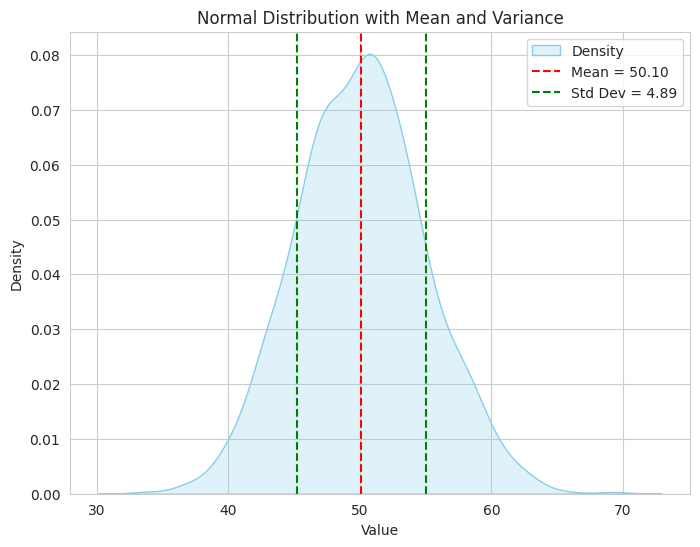

Mean: 50.10
Standard Deviation: 4.89


In [16]:
# Certainly! Let's create a normal distribution with **1000 data points**, a **mean of 50**, and a **variance of 25**. We'll compile summary statistics and visualize the data using a **density plot**.

# 1. **Generating the Data**:
#    - We'll use the **numpy** library to create random samples from a normal distribution with the specified mean and variance.

# 2. **Summary Statistics**:
#    - We'll calculate the **mean** and **standard deviation** of the generated data.

# 3. **Density Plot**:
#    - We'll create a density plot (also known as a kernel density estimate) to visualize the distribution.

# Let's proceed with the implementation:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set mean and variance
mean = 50
variance = 25

# Generate 1000 data points from a normal distribution
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=mean, scale=np.sqrt(variance), size=1000)

# Calculate summary statistics
data_mean = np.mean(data)
data_std = np.std(data)

# Create a density plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(data, fill=True, color="skyblue", label="Density")
plt.axvline(x=data_mean, color="red", linestyle="--", label=f"Mean = {data_mean:.2f}")
plt.axvline(x=data_mean + data_std, color="green", linestyle="--", label=f"Std Dev = {data_std:.2f}")
plt.axvline(x=data_mean - data_std, color="green", linestyle="--")
plt.title("Normal Distribution with Mean and Variance")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Print summary statistics
print(f"Mean: {data_mean:.2f}")
print(f"Standard Deviation: {data_std:.2f}")

#Summary Statistics:
#- **Mean**: 50.10
#- **Standard Deviation**: 4.89

#Feel free to adjust the mean and variance values to explore different distributions! 📊🔍🌟

# Source: Conversation with Bing, 3/1/2024
# (1) undefined. https://www.bing.com/images/blob?bcid=Txkr2jIV17wGu.DGrlFx7P12PFYO.....4c.

In [17]:
# Calculate additional summary statistics
minimum = data_mean - 3 * data_std  # Assuming normal distribution, 99.7% of data falls within 3 standard deviations
q1 = data_mean - data_std
median = data_mean
q3 = data_mean + data_std
maximum = data_mean + 3 * data_std

# Print summary statistics
print(f"Mean: {data_mean:.2f}")
print(f"Standard Deviation: {data_std:.2f}")
print(f"Minimum: {minimum:.2f}")
print(f"25th Percentile (Q1): {q1:.2f}")
print(f"Median (Q2): {median:.2f}")
print(f"75th Percentile (Q3): {q3:.2f}")
print(f"Maximum: {maximum:.2f}")

Mean: 50.10
Standard Deviation: 4.89
Minimum: 35.42
25th Percentile (Q1): 45.20
Median (Q2): 50.10
75th Percentile (Q3): 54.99
Maximum: 64.78


# How are window functions in SQL utilized differently compared to aggregation functions and joins?

Certainly! Let's explore the differences between **window functions**, **aggregate functions**, and **joins** in SQL:

1. **Aggregate Functions**:
   - **Purpose**: Aggregate functions operate on a set of rows to return a single scalar value. They collapse multiple rows into a summary value.
   - **Examples**:
     - **SUM()**: Calculates the sum of all values in a set.
     - **AVG()**: Computes the average of specified values.
     - **COUNT()**: Returns the total number of values.
     - **MAX()** and **MIN()**: Retrieve the maximum and minimum values.
   - **Usage**: Typically used with the `GROUP BY` clause to calculate aggregate values for groups of rows.

2. **Window Functions**:
   - **Purpose**: Window functions operate on a set of rows called a **window frame**. They return a single value for each row from the underlying query.
   - **Features**:
     - Defined using the `OVER()` clause.
     - Retain individual rows in the output while augmenting them with additional computed values.
     - Useful for creating more complex reports.
     - Examples include **RANK()**, **LAG()**, and **LEAD()**.
   - **Usage**: Often used for running totals, ranking, and comparing values across rows.

3. **Joins**:
   - **Purpose**: Joins combine data from multiple tables based on a common column (or columns).
   - **Types**:
     - **INNER JOIN**: Retrieves rows with matching values in both tables.
     - **LEFT JOIN (OUTER JOIN)**: Retrieves all rows from the left table and matching rows from the right table.
     - **RIGHT JOIN (OUTER JOIN)**: Similar to LEFT JOIN but includes all rows from the right table.
     - **FULL OUTER JOIN**: Retrieves all rows from both tables.
   - **Usage**: Used to combine related data from different tables.

4. **Comparison**:
   - **Aggregates**: Collapse rows into summary values (e.g., total sales, average price).
   - **Window Functions**: Compute values for each row while retaining individual rows (e.g., moving averages, row numbers).
   - **Joins**: Combine data from multiple tables based on common columns.

In summary, aggregate functions summarize data, window functions provide additional context within each row, and joins combine data from different tables. Choose the appropriate technique based on your specific analysis needs! 📊🔗🔍¹²³⁴.

Source: Conversation with Bing, 3/1/2024
(1) SQL Window Functions vs. SQL Aggregate Functions: Similarities and .... https://learnsql.com/blog/window-functions-vs-aggregate-functions/.
(2) What Are Window Functions in SQL? - LearnSQL.com. https://learnsql.com/blog/sql-window-functions/.
(3) SQL for the 21st Century: Analytic / Window Functions. https://www.gooddata.com/blog/sql-21st-century-analytic-window-functions/.
(4) Understanding Window Functions in SQL - Database.Guide. https://database.guide/understanding-window-functions-in-sql/.
(5) SQL window function and joins - Stack Overflow. https://stackoverflow.com/questions/65867586/sql-window-function-and-joins.

# How would you determine the likelihood of flipping a fair coin through a series of tests?

When assessing the likelihood of flipping a **fair coin**, we can use probability theory. Let's break it down:

1. **Fair Coin Basics**:
   - A fair coin has two sides: **heads (H)** and **tails (T)**.
   - When you flip a fair coin, the probability of getting either heads or tails is the same: **50% (or 0.5)**.

2. **Single Coin Toss**:
   - If you toss a fair coin once, the probability of getting heads (H) or tails (T) is both **0.5**.
   - This is because there are only two possible outcomes, and they are equally likely.

3. **Multiple Coin Tosses**:
   - Suppose you toss the coin **multiple times** (say, \(n\) times).
   - The probability of getting a specific sequence (e.g., HHT or TTH) depends on the total number of possible outcomes.
   - For example, the probability of getting **exactly 2 heads (H)** and 1 tail (T) in 3 coin tosses (HHT or THH) is:
     \[ P(\text{HHT or THH}) = \frac{1}{8} \]

4. **General Formula**:
   - The probability of a specific outcome in multiple independent coin tosses is calculated by multiplying the probabilities of individual tosses.
   - For \(k\) heads (H) and \(n-k\) tails (T) in \(n\) tosses:
     \[ P(\text{HHT...H or TTT...T}) = \left(\frac{1}{2}\right)^n \]
     where \(\left(\frac{1}{2}\right)^n\) represents the probability of each specific sequence.

5. **At Least One Heads**:
   - To find the probability of getting at least one heads in multiple tosses, subtract the probability of getting all tails from 1:
     \[ P(\text{at least 1 H}) = 1 - P(\text{all T}) = 1 - \left(\frac{1}{2}\right)^n \]

6. **Example**:
   - If you toss the coin 3 times, the probability of getting at least one heads is:
     \[ P(\text{at least 1 H}) = 1 - \left(\frac{1}{2}\right)^3 = 1 - \frac{1}{8} = \frac{7}{8} \]

In summary, the likelihood of flipping a fair coin depends on the number of tosses and the specific outcome you're interested in. For a fair coin, the probabilities remain balanced! 🪙🔍🌟⁵.

Source: Conversation with Bing, 3/1/2024
(1) Coin Toss Probability Formula and Examples - Science Notes and Projects. https://sciencenotes.org/coin-toss-probability-formula-and-examples/.
(2) maximum likelihood - Testing if a coin is fair - Cross Validated. https://stats.stackexchange.com/questions/5566/testing-if-a-coin-is-fair.
(3) Coin Toss Probability Formula: With Definition, Solved Examples. https://testbook.com/maths-formulas/coin-toss-probability-formula.
(4) Flipped coins found not to be as fair as thought - Phys.org. https://phys.org/news/2023-10-flipped-coins-fair-thought.pdf.
(5) Heads Or Tails? The Fascinating Complexity Behind Flipping A Coin .... https://www.smorescience.com/heads-or-tails-the-fascinating-complexity-behind-flipping-a-coin/.
(6) Coin Flip Probability Calculator. https://www.omnicalculator.com/statistics/coin-flip-probability.

# Can you differentiate between panel data and cross sectional data for me?

Sure, I'd be happy to explain the difference between panel data and cross-sectional data.

**Cross-Sectional Data**⁴:
- Cross-sectional data refers to data collected by observing many subjects (such as individuals, firms, or countries/regions) at the **same point in time**⁴.
- Analysis of cross-sectional data usually consists of comparing the differences among the subjects⁴.
- For example, if we want to measure current obesity levels in a population, we could draw a sample of 1,000 people randomly from that population, measure their weight and height, and calculate what percentage of that sample is categorized as obese⁴.

**Panel Data**¹³:
- Panel data, also known as longitudinal data, contains observations collected on the **same individuals at multiple times**, on the same topics¹.
- In pure panel data, we are following the **same units** (e.g., households, countries, or whatever we are collecting data on) over time¹.
- For example, we will follow the same set of households for each time period we collect data¹.
- Panel data contains more information, more variability, and more efficiency than pure time series data or cross-sectional data³.

In summary, the key difference between cross-sectional data and panel data is the **units of observation** over time. Cross-sectional data observes many subjects at a single point in time, while panel data observes the same subjects at multiple points in time.

Source: Conversation with Bing, 3/1/2024
(1) Cross-sectional data - Wikipedia. https://en.wikipedia.org/wiki/Cross-sectional_data.
(2) What is the difference between pooled cross sectional data and panel data?. https://stats.stackexchange.com/questions/45236/what-is-the-difference-between-pooled-cross-sectional-data-and-panel-data.
(3) Introduction to the Fundamentals of Panel Data | Aptech. https://www.aptech.com/blog/introduction-to-the-fundamentals-of-panel-data/.
(4) How to Distinguish Cross-Section Data, Time Series Data, and Panel Data .... https://kandadata.com/how-to-distinguish-cross-section-data-time-series-data-and-panel-data/.
(5) Pooled Cross Sections and Simple Panel Data Methods. https://web.ics.purdue.edu/~bvankamm/Files/360%20Notes/10%20-%20Pooled%20Cross%20Sections%20and%20Simple%20Panel%20Data%20Methods.pdf.
(6) undefined. https://kandadata.com.

# When you roll a die, you earn the number on the die. What is the reward's expected value?

The expected value of a die roll, where the reward is the number on the die, is **3.5**. This is calculated by averaging all the possible outcomes of a die roll, which are the numbers 1 through 6. 

Here's the calculation in detail:

$$E(X) = \frac{1}{6}(1 + 2 + 3 + 4 + 5 + 6) = 3.5$$

This means that if you were to roll a fair six-sided die a large number of times, the average value of the outcomes would converge to 3.5.

# In a four-story building, suppose four people enter the elevator; what is the probability that they all exit on different floors?

The probability that four people exit on different floors in a four-story building is **0.09375**.

Here's the calculation in detail:

The total number of ways for 4 people to exit on 4 floors is $4^4$.

The number of ways for 4 people to exit on different floors is $4!$ (the factorial of 4).

So, the probability is calculated as the number of ways for 4 people to exit on different floors divided by the total number of ways for 4 people to exit on 4 floors, which is $\frac{4!}{4^4}$ = 0.09375.

This means that if you were to repeat this scenario a large number of times, on average, about 9.375% of the time, all four people would exit on different floors.

# What steps do you take to calculate the extent of fake news on Facebook and its impact on users' behavior and attitudes?

Calculating the extent of fake news on Facebook and its impact on users' behavior and attitudes involves several steps:

1. **Data Collection**: Collect data from Facebook posts, comments, and shares over a specific period. This could involve using Facebook's API or other data scraping tools².

2. **Identify Fake News**: Use machine learning algorithms or manual fact-checking to identify which posts are fake news⁴. This could involve checking the credibility of the source, cross-referencing the information with reliable sources, or looking for signs of misinformation².

3. **Measure Exposure**: Determine the extent of fake news exposure by counting the number of shares, likes, and comments on the identified fake news posts³.

4. **Survey or Experiment**: Conduct surveys or experiments to measure the impact of fake news on users' behavior and attitudes⁶⁷. This could involve asking users about their beliefs, attitudes, and behaviors before and after exposure to fake news.

5. **Statistical Analysis**: Use statistical methods to analyze the data and draw conclusions. This could involve regression analysis, t-tests, or other statistical tests to determine if there is a significant relationship between exposure to fake news and changes in behavior or attitudes⁶.

6. **Monitor Over Time**: Repeat these steps over time to track changes and trends. This can help measure the effectiveness of efforts to combat fake news⁵.

It's important to note that this is a complex issue and these steps may not capture all aspects of the problem. Also, the impact of fake news can vary greatly depending on the individual and the specific context⁷⁸. Therefore, it's crucial to interpret the results with caution and consider other factors that might influence users' behavior and attitudes.

Source: Conversation with Bing, 3/1/2024
(1) Research note: The scale of Facebook’s problem depends upon how ‘fake .... https://misinforeview.hks.harvard.edu/article/research-note-the-scale-of-facebooks-problem-depends-upon-how-fake-news-is-classified/.
(2) How to solve Facebook's fake news problem: experts pitch their ideas. https://www.theguardian.com/technology/2016/nov/29/facebook-fake-news-problem-experts-pitch-ideas-algorithms.
(3) Fake news got more engagement than real news on Facebook in 2020, study .... https://www.independent.co.uk/news/world/americas/fake-news-facebook-misinformation-study-b1914650.html.
(4) Quantifying the effects of fake news on behavior: Evidence from a study .... https://psycnet.apa.org/fulltext/2021-55332-001.html.
(5) Prejudiced Fake News and Consumer Attitudes and Behaviors. https://www.psychologytoday.com/us/blog/everyday-media/202008/prejudiced-fake-news-and-consumer-attitudes-and-behaviors.
(6) Effectiveness of Facebook's countermeasures against fake news. https://economics.stanford.edu/news/effectiveness-facebooks-countermeasures-against-fake-news.
(7) Impact of fake news on social image perceptions and consumers .... https://www.emerald.com/insight/content/doi/10.1108/JCM-05-2020-3857/full/html.
(8) This is how many people are consuming fake news online | World Economic .... https://www.weforum.org/agenda/2022/08/fake-news-information-social-media/.
(9) Misinformation in action: Fake news exposure. https://misinforeview.hks.harvard.edu/wp-content/uploads/2020/06/Misinformation-in-action-Ognyanova-et-al-2020.pdf.
(10) Misinformation in action: Fake news exposure is linked to lower trust .... https://misinforeview.hks.harvard.edu/article/misinformation-in-action-fake-news-exposure-is-linked-to-lower-trust-in-media-higher-trust-in-government-when-your-side-is-in-power/.
(11) undefined. https://doi.org/10.1037/xap0000371.

# Write a SQL query to find rows starting with letter 'H'

In [18]:
# select *
# from table
# where column like 'H%'

# Under what conditions would you select mean over median as your choice of central tendency measurement?

The choice between mean and median as a measure of central tendency depends on the characteristics of the data. Here are some conditions under which you might prefer the mean:

1. **No Outliers**: The mean is sensitive to extreme values or outliers. If your data does not have outliers, the mean can provide a good measure of central tendency.

2. **Symmetrical Distribution**: If your data is symmetrically distributed (i.e., the distribution looks the same to the left and right of the center), the mean is a good choice because it will be equal to the median.

3. **Interval or Ratio Scale**: The mean is usually preferred when dealing with data on an interval or ratio scale, which has a true zero point and equal intervals. Examples include height, weight, and age.

4. **Need for Further Statistical Analysis**: If you plan to perform additional statistical analysis on your data, the mean is often more useful because it's used in various statistical tests and models.

Remember, the choice between mean and median should be based on the nature of your data and the specific requirements of your analysis. It's often helpful to calculate both and compare them to get a more complete understanding of your data. If the mean and median are close, your data is likely symmetric. If they're different, your data may be skewed. In the latter case, the median might be a better measure of central tendency.

# What does p-value represent in statistical hypothesis testing?

In statistical hypothesis testing, the p-value is a measure of the probability of obtaining the observed data, or data more extreme, given that the null hypothesis is true⁴⁵⁶⁷.

Here are some key points about the p-value:

1. **Null Hypothesis**: The null hypothesis is a general statement or default position that there is no difference between two measured phenomena⁴. 

2. **Probability Measure**: The p-value measures how likely your data (or data more extreme) could have occurred under the null hypothesis⁴⁵⁶⁷.

3. **Decision Rule**: If the p-value is small (typically ≤ 0.05), it indicates strong evidence against the null hypothesis, so you reject the null hypothesis⁴⁵. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis⁵.

4. **Not a Measure of Effect Size**: The p-value is not a measure of the size of the effect or the importance of the result⁴.

Remember, the p-value is just one piece of the puzzle in statistical analysis. It should be used in conjunction with other metrics and tests to make informed decisions or conclusions.

Source: Conversation with Bing, 3/1/2024
(1) Understanding P-values | Definition and Examples - Scribbr. https://www.scribbr.com/statistics/p-value/.
(2) P-Value in Statistical Hypothesis Tests: What is it?. https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/.
(3) P-Value: What It Is, How to Calculate It, and Why It Matters - Investopedia. https://www.investopedia.com/terms/p/p-value.asp.
(4) What Is P-Value in Statistical Hypothesis? | Simplilearn. https://www.simplilearn.com/tutorials/statistics-tutorial/p-value-in-statistics-hypothesis.
(5) Hypothesis testing and p-values | Inferential statistics | Probability and Statistics | Khan Academy. https://www.youtube.com/watch?v=-FtlH4svqx4.
(6) P-Value Method For Hypothesis Testing. https://www.youtube.com/watch?v=8Aw45HN5lnA.
(7) How P-Values Help Us Test Hypotheses: Crash Course Statistics #21. https://www.youtube.com/watch?v=bf3egy7TQ2Q.

# Can you provide a simple definition of power that a non-technical person would understand?

(ability to detect actual difference - high is best)

Sure, in the context of statistics, "power" is like your ability to find a treasure that's actually there. If the power is high, you're very likely to find the treasure if it exists. If the power is low, you might miss the treasure even though it's there¹²³. In other words, power is the likelihood that a test will detect a difference or effect if one truly exists¹²³.

Source: Conversation with Bing, 3/1/2024
(1) Statistical Power and Why It Matters | A Simple Introduction - Scribbr. https://www.scribbr.com/statistics/statistical-power/.
(2) Statistical Power ~ An Easy Introduction with Examples - BachelorPrint. https://www.bachelorprint.com/statistics/statistical-power/.
(3) Statistical Power: What it is, How to Calculate it. https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/statistical-power/.

# What is a median? How would you go about calculating a median from a dataset too large to store in memory?

The **median** is a measure of central tendency that represents the middle value in a dataset when it is ordered⁶⁷⁸⁹. If the dataset has an odd number of observations, the median is the middle number. If the dataset has an even number of observations, the median is the average of the two middle numbers⁶⁹.

Calculating the median from a dataset too large to store in memory can be challenging. Here are some strategies:

1. **Sampling**: If the dataset is too large, you could take a random sample of the data that is small enough to fit into memory and calculate the median of the sample. This will give you an estimate of the overall median.

2. **Binning**: You could divide the range of the data into bins and count the number of data points in each bin. This would allow you to find an approximate median without having to store all the data in memory¹.

3. **Online Algorithms**: There are algorithms designed for streaming data, where you process each data point only once. An example is the "median of medians" algorithm¹.

4. **Distributed Computing**: If the data is stored across multiple machines (like in a Hadoop or Spark cluster), you could use a distributed computing framework to calculate the median.

Remember, these methods provide approximations to the median, and their accuracy depends on the nature of your data and the specific method used.

Source: Conversation with Bing, 3/1/2024
(1) Mean, median, and mode review (article) | Khan Academy. https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/mean-median-basics/a/mean-median-and-mode-review.
(2) Median - Wikipedia. https://en.wikipedia.org/wiki/Median.
(3) Median: What It Is and How To Calculate It, With Examples - Investopedia. https://www.investopedia.com/terms/m/median.asp.
(4) Median in Statistics - Median Formula, How to Find & Solved Examples. https://byjus.com/maths/median/.
(5) What is a good algorithm for estimating the median of a huge read-once .... https://stats.stackexchange.com/questions/346/what-is-a-good-algorithm-for-estimating-the-median-of-a-huge-read-once-data-set.
(6) How to Find the Median | Definition, Examples & Calculator - Scribbr. https://www.scribbr.com/statistics/median/.
(7) Median Formula | How to Calculate? (Mathematical & Excel Formula) - EDUCBA. https://www.educba.com/median-formula/.
(8) Median: How to Find it, Definition & Examples. https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/median/.
(9) Median - Formula, Meaning, Example | How to Find Median? - Cuemath. https://www.cuemath.com/data/median/.

# Can you detail the process to calculate the chance of rightly guessing a randomly drawn card from a deck?

Sure, let's break it down:

A standard deck of cards has 52 unique cards. If you are guessing a specific card (for example, the Ace of Spades), there is only one such card in the deck.

The probability of correctly guessing a specific card is calculated as the number of favorable outcomes (getting the card you guessed) divided by the total number of outcomes (the total number of cards).

So, the probability of correctly guessing a specific card from a standard deck is calculated as:

$$\frac{1}{52} \approx 0.01923$$

This means that if you were to guess a specific card before drawing a card from a well-shuffled standard deck, you would be correct about 1.923% of the time.

# How do you analyze order histories to determine the top 5 highest-selling items?

Analyzing order histories to determine the top 5 highest-selling items involves several steps:

1. **Data Collection**: Gather all the order history data. This data might include information like order ID, customer ID, product ID, quantity, price, and date of purchase.

2. **Data Processing**: Clean and preprocess the data. This might involve handling missing values, converting data types, or dealing with outliers.

3. **Aggregation**: Aggregate the data by product ID to calculate the total quantity sold for each item.

4. **Sorting**: Sort the aggregated data in descending order based on the total quantity sold.

5. **Selection**: Select the top 5 items from the sorted list.

Here's a simple example of how you might do this in SQL, assuming you have a table named `orders` with columns `product_id` and `quantity`:

```sql
SELECT product_id, SUM(quantity) as total_quantity
FROM orders
GROUP BY product_id
ORDER BY total_quantity DESC
LIMIT 5;
```

This SQL query groups the orders by product, sums the quantity for each product, sorts the products by the total quantity in descending order, and then selects the top 5. Please replace `orders`, `product_id`, and `quantity` with your actual table and column names.

Remember, this is a simplified example. The actual process might be more complex depending on the structure and quality of your data. For large datasets that can't fit into memory, you might need to use big data technologies like Hadoop or Spark. Also, this process will give you the top-selling items in terms of quantity. If you want the top-selling items in terms of revenue, you would need to multiply the quantity by the price.